
File to Principal Component Mapping:
./data/conf_1.pdb --> PC1
./data/conf_2.pdb --> PC1
./data/conf_3.pdb --> PC1
./data/conf_4.pdb --> PC1


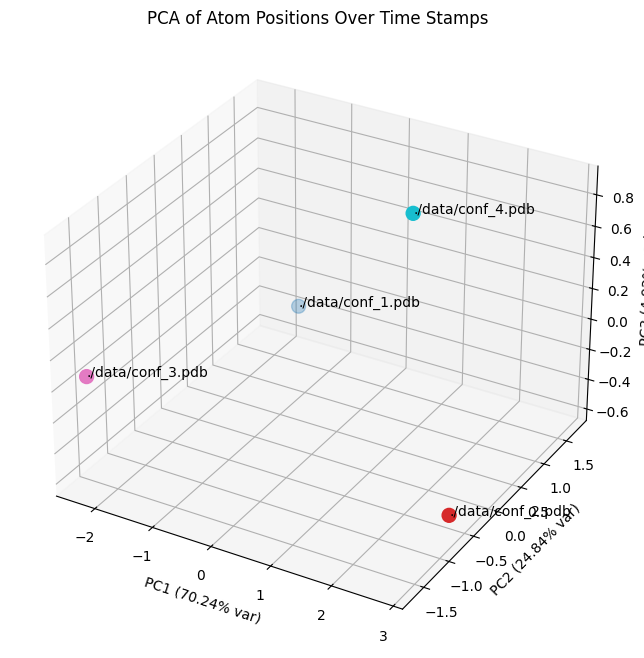


Explained Variance by PCs:
PC1: 70.24%
PC2: 24.84%
PC3: 4.92%


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA

def load_pdb_coordinates(filename):
    coords = []
    with open(filename, 'r') as f:
        for line in f:
            if line.startswith(('ATOM', 'HETATM')):
                x = float(line[30:38])
                y = float(line[38:46])
                z = float(line[46:54])
                coords.append([x, y, z])
    return np.array(coords)

# --- Configurable Variables ---
files = ['./data/conf_1.pdb', './data/conf_2.pdb', './data/conf_3.pdb', './data/conf_4.pdb']
n_files = len(files)

num_atoms_to_show = 3    # <<< How many atoms to plot
show_labels = True         # <<< Show/hide labels
connect_atoms = True       # <<< Connect atoms into a shape

# Step 1: Load and prepare the data
all_data = []
for file in files:
    coords = load_pdb_coordinates(file)
    coords = coords[:num_atoms_to_show]    # Limit atoms
    coords_flattened = coords.flatten()     # Flatten into 1D
    all_data.append(coords_flattened)

all_data = np.array(all_data)  # Shape (n_files, n_atoms*3)

# Step 2: Apply PCA
pca = PCA(n_components=min(n_files, 3))  # Max 3 PCs for visualization
pca_result = pca.fit_transform(all_data)

explained_var = pca.explained_variance_ratio_

# Step 3: Map files to PCs
file_to_pc = np.argmax(np.abs(pca_result), axis=1)  # Which PC has highest value for this file

print("\nFile to Principal Component Mapping:")
for idx, pc in enumerate(file_to_pc):
    print(f"{files[idx]} --> PC{pc+1}")

# Step 4: Visualization
fig = plt.figure(figsize=(10, 8))

if pca_result.shape[1] >= 3:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=np.arange(n_files), cmap='tab10', s=100)

    for i in range(n_files):
        ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], f'{files[i]}', size=10)

    ax.set_xlabel(f'PC1 ({explained_var[0]*100:.2f}% var)')
    ax.set_ylabel(f'PC2 ({explained_var[1]*100:.2f}% var)')
    ax.set_zlabel(f'PC3 ({explained_var[2]*100:.2f}% var)')
else:
    ax = fig.add_subplot(111)
    ax.scatter(pca_result[:, 0], pca_result[:, 1], c=np.arange(n_files), cmap='tab10', s=100)

    for i in range(n_files):
        ax.text(pca_result[i, 0], pca_result[i, 1], f'{files[i]}', size=10)

    ax.set_xlabel(f'PC1 ({explained_var[0]*100:.2f}% var)')
    ax.set_ylabel(f'PC2 ({explained_var[1]*100:.2f}% var)')

plt.title('PCA of Atom Positions Over Time Stamps')
plt.grid(True)
plt.show()

# Step 5: Explained variance
print("\nExplained Variance by PCs:")
for idx, var in enumerate(explained_var):
    print(f"PC{idx+1}: {var*100:.2f}%")
